<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Sep_8_9/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from pandas.core.api import DataFrame
#Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
df=pd.read_csv("/content/drive/MyDrive/Machine_Learning/CarPrice_Assignment.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Separate Numerical and  Categorical data

In [6]:
tipo_de_dato = df.dtypes

# Crear listas para almacenar las columnas numéricas y categóricas
columnas_numericas = [columna for columna, tipo in tipo_de_dato.items() if pd.api.types.is_numeric_dtype(tipo)]
columnas_categoricas = [columna for columna, tipo in tipo_de_dato.items() if not pd.api.types.is_numeric_dtype(tipo)]


print("Columnas Numéricas:")
print(columnas_numericas)

print("\nColumnas Categóricas:")
print(columnas_categoricas)

Columnas Numéricas:
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Columnas Categóricas:
['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [7]:
#Analiza la dependencia del valor del auto como función de cada variable categorica

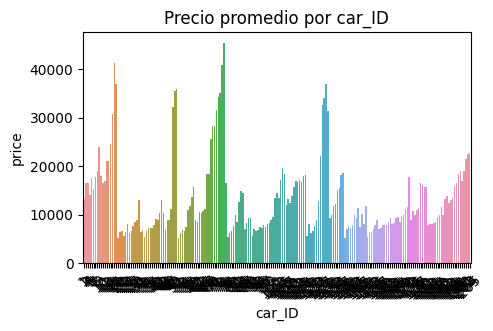

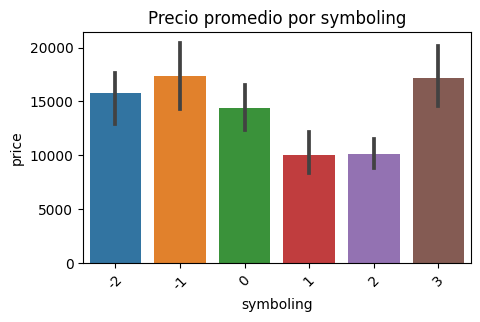

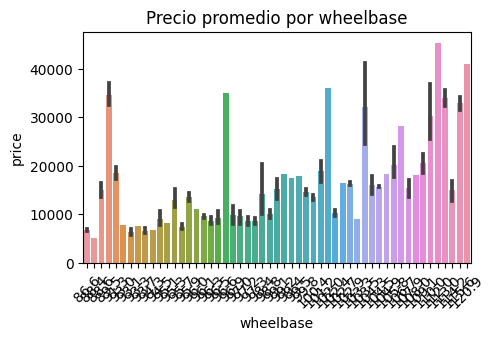

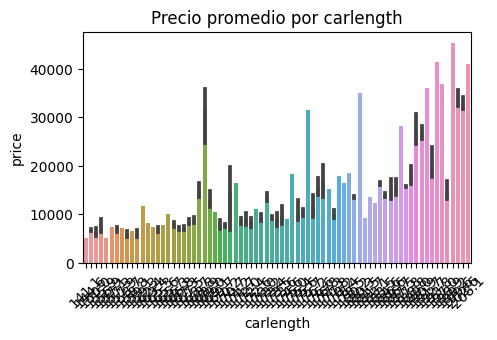

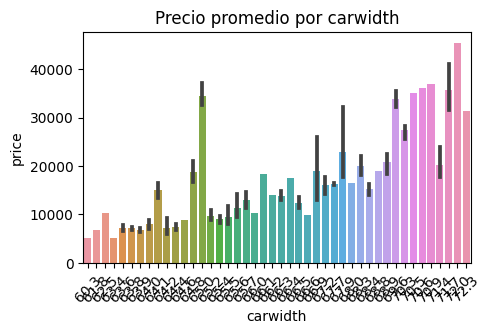

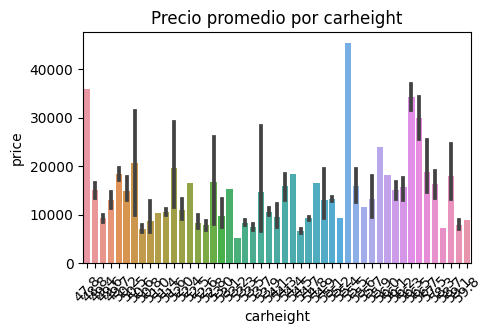

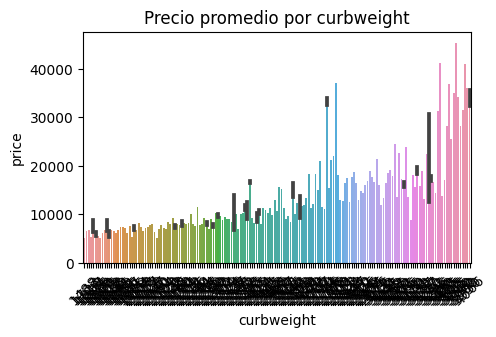

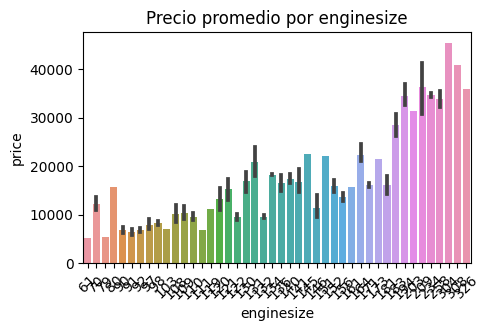

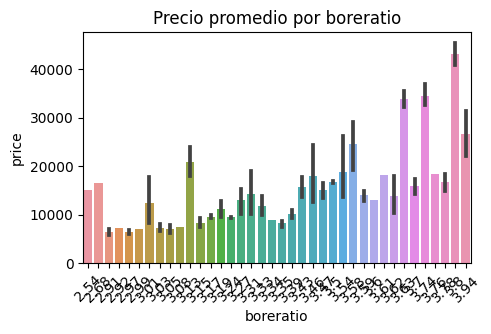

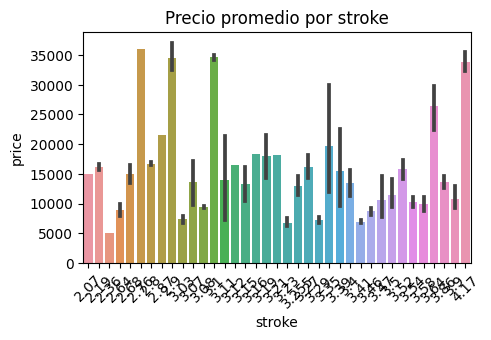

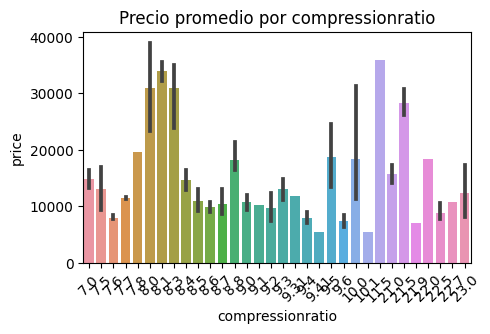

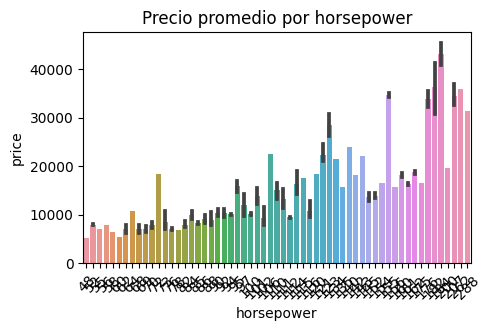

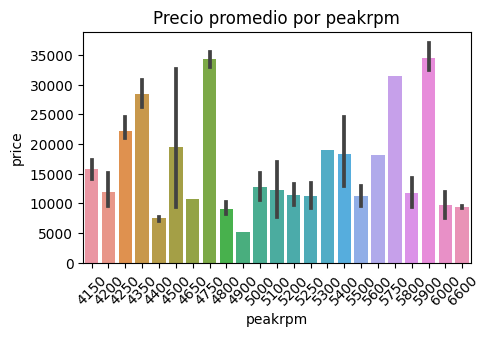

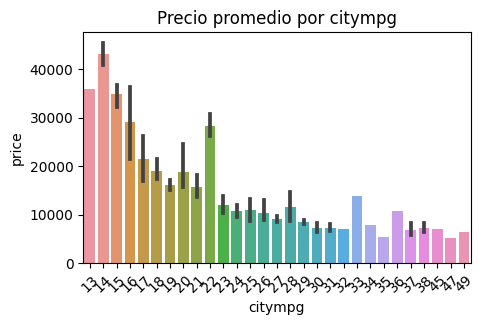

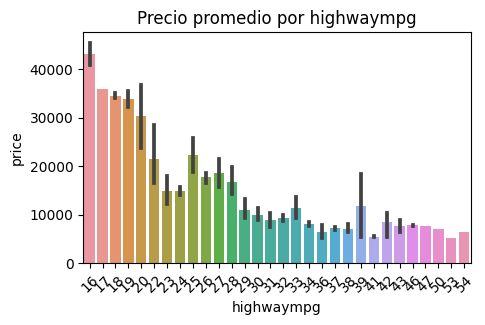

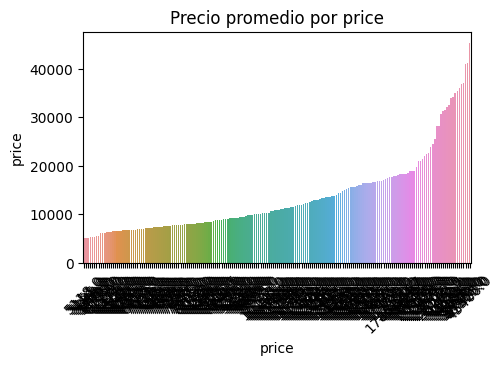

In [8]:
for columna_numerica in columnas_numericas:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=columna_numerica, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Precio promedio por {columna_numerica}')
    plt.show()

In [9]:
#Analiza la dependencia del valor del auto como función de cada variable numerica

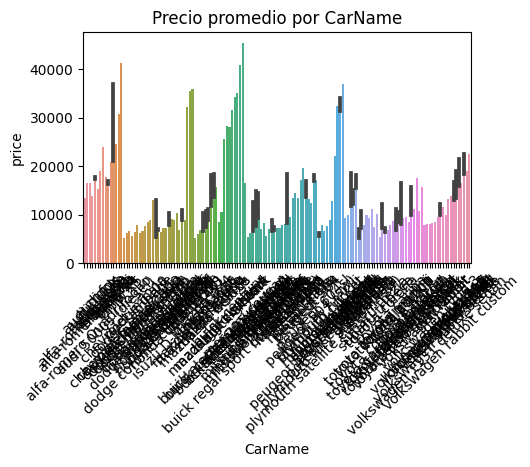

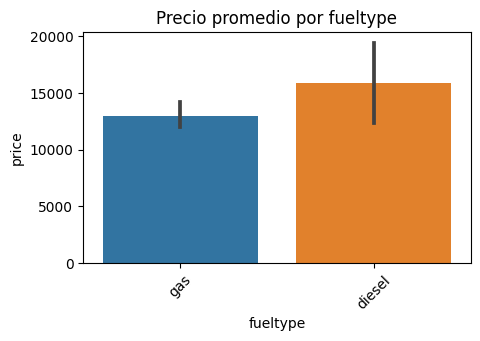

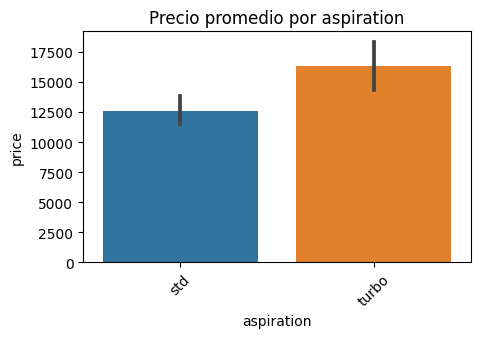

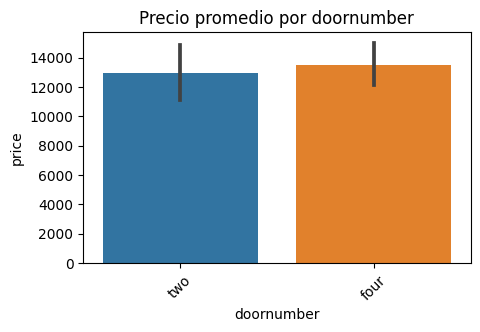

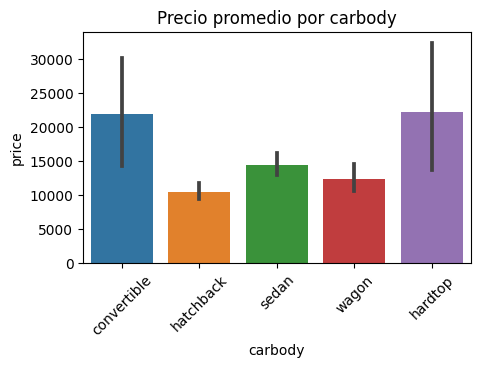

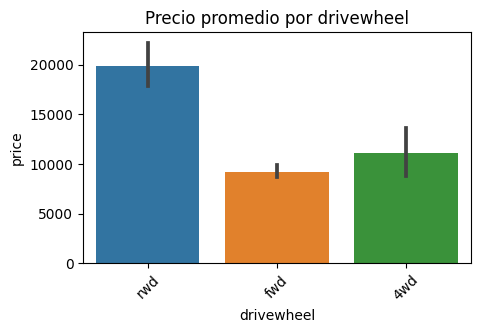

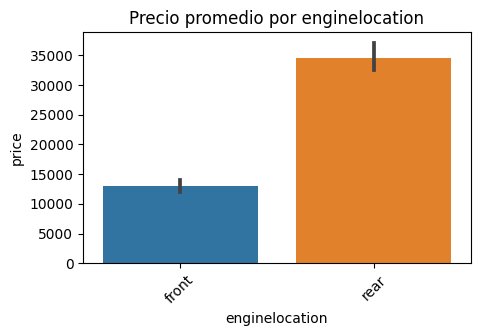

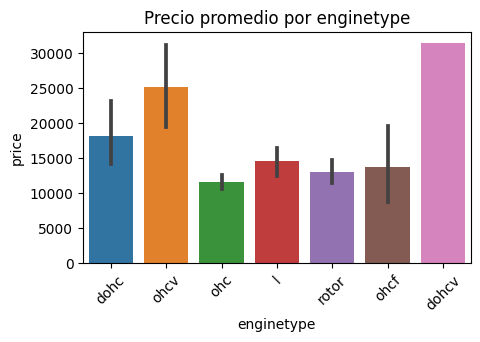

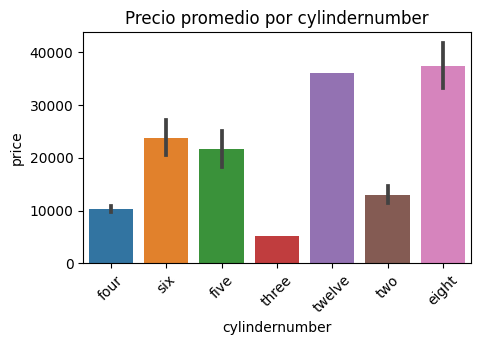

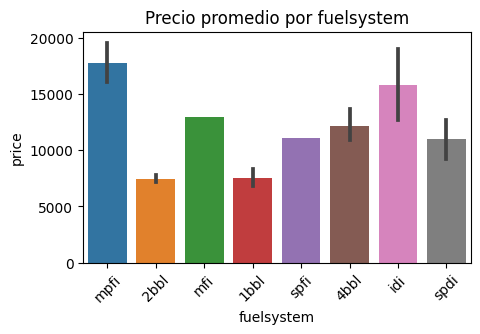

In [10]:
for columna_categorica in columnas_categoricas:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=columna_categorica, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Precio promedio por {columna_categorica}')
    plt.show()

In [32]:
#Define que variables numericas y categoricas usarás para crear tu modelo lineal.
use_vars=['horsepower', 'enginesize', 'drivewheel', 'boreratio', 'wheelbase', 'stroke']
categorical_vars=['fuelsystem', 'cylindernumber', 'enginetype', 'enginelocation', 'carbody']

In [33]:
#Convierte las variables categoricas en variables "dummy" usando el siguiente código
df1=df[use_vars]
df2_1 = pd.get_dummies(df['fuelsystem'])
df2_2 = pd.get_dummies(df['cylindernumber'])
df2_3 = pd.get_dummies(df['enginetype'])
df2_4 = pd.get_dummies(df['enginelocation'])
df2_5 = pd.get_dummies(df['carbody'])
df21 = np.hstack((df2_1,df2_2))
df22 = np.hstack((df21,df2_3))
df23 = np.hstack((df22, df2_4))
df2 = np.hstack((df23, df2_5))

<Axes: >

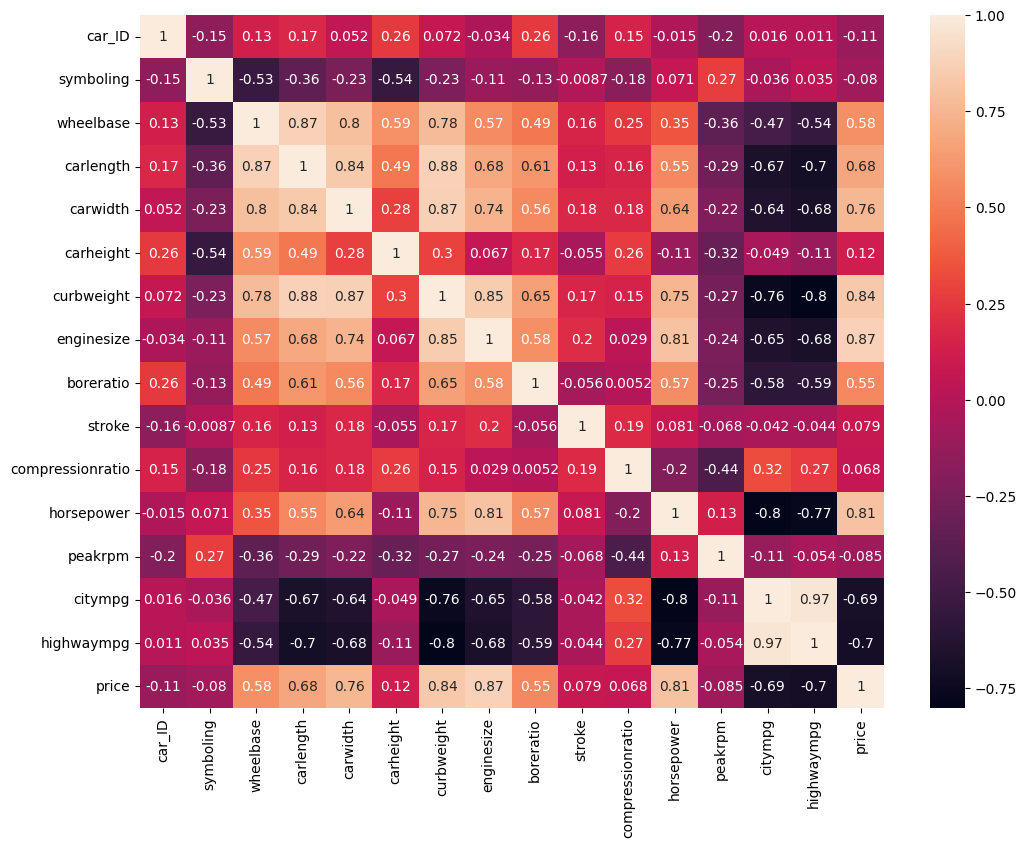

In [13]:
#Checa la correlación entre todas las variables usando un "heat map"
fig,ax=plt.subplots(1,1,figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

In [14]:
#Construye la matriz de caracteristicas X y el vector de target t.
#Normaliza las caracteristicas y procede a generar el modelo.
# Usa el 20% de los datos como conjunto de validación
# Utiliza Keras () para que puedas analizar la dependencia de la función costo como función del parametro de aprendizaje, para diferentes valores, y decidas cual usar.
# Posteriormente utiliza scikit-learn para comprobar tu resultado

In [40]:
X = np.hstack((df1,df2))
t = df['price']

In [38]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

ValueError: ignored

In [ ]:
sgdr = SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.01)
sgdr.fit(X_norm, t)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

In [ ]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

In [ ]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*X_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],t, label = 'target', color = 'black')
    ax[i].scatter(X[:,i],yp,color="green", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

In [ ]:
#Ahora lo hacemos para un conjunto de prueba del 20%
X_train, X_test, y_train, y_test = train_test_split(X_norm, t, test_size=0.20, random_state=42)

In [ ]:
#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

In [ ]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

In [ ]:
#Test score
sgdr.score(X_test,y_test)

In [ ]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [ ]:
input_dim = 35
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

In [ ]:
num_epochs = 100
batch_size =X_train.shape[20] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

In [ ]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot(color = 'green');

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
score

In [ ]:
#Prueba con otros modelos, donde uses mas o menos caracteristicas. ¿cuál es el modelo que mejor desempeño tiene?